In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import random

from sklearn.preprocessing import LabelEncoder
kendaraan = pd.read_csv("kendaraan_train.csv")

In [2]:
kendaraan

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20092,20093,Wanita,42.0,1.0,28.0,1.0,1-2 Tahun,Tidak,45878.0,26.0,211.0,0.0
20093,20094,Wanita,51.0,1.0,50.0,0.0,> 2 Tahun,Pernah,24710.0,8.0,61.0,0.0
20094,20095,Pria,24.0,1.0,15.0,1.0,< 1 Tahun,Tidak,54678.0,152.0,40.0,0.0
20095,20096,Wanita,43.0,1.0,18.0,1.0,1-2 Tahun,Tidak,30408.0,NaN,189.0,0.0


# Eksplorasi dan Persiapan Data

In [3]:
#Check Null
kendaraan.isnull().sum()

id                      0
Jenis_Kelamin        1024
Umur                  938
SIM                  1057
Kode_Daerah          1028
Sudah_Asuransi       1006
Umur_Kendaraan       1012
Kendaraan_Rusak       970
Premi                1020
Kanal_Penjualan      1001
Lama_Berlangganan     958
Tertarik                1
dtype: int64

In [4]:
#Modus Jenis Kelamin
kendaraan['Jenis_Kelamin'].value_counts()

Pria      10364
Wanita     8709
Name: Jenis_Kelamin, dtype: int64

In [5]:
kendaraan['Jenis_Kelamin']=kendaraan['Jenis_Kelamin'].fillna('Pria')

In [6]:
kendaraan['Umur']=kendaraan['Umur'].fillna(kendaraan['Umur'].mean())

In [7]:
kendaraan['SIM']=kendaraan['SIM'].fillna(kendaraan['SIM'].mean())

In [8]:
kendaraan['Kode_Daerah']=kendaraan['Kode_Daerah'].fillna(kendaraan['Kode_Daerah'].mean())

In [9]:
kendaraan['Sudah_Asuransi']=kendaraan['Sudah_Asuransi'].fillna(kendaraan['Sudah_Asuransi'].mean())

In [10]:
#Modus Umur Kendaraan
kendaraan['Umur_Kendaraan'].value_counts()

1-2 Tahun    10034
< 1 Tahun     8225
> 2 Tahun      826
Name: Umur_Kendaraan, dtype: int64

In [11]:
kendaraan['Umur_Kendaraan']=kendaraan['Umur_Kendaraan'].fillna('1-2 Tahun')

In [12]:
#Modus Kendaraan Rusak
kendaraan['Kendaraan_Rusak'].value_counts()

Pernah    9727
Tidak     9400
Name: Kendaraan_Rusak, dtype: int64

In [13]:
kendaraan['Kendaraan_Rusak']=kendaraan['Kendaraan_Rusak'].fillna('Pernah')

In [14]:
kendaraan['Premi']=kendaraan['Premi'].fillna(kendaraan['Premi'].mean())

In [15]:
kendaraan['Kanal_Penjualan']=kendaraan['Kanal_Penjualan'].fillna(kendaraan['Kanal_Penjualan'].mean())

In [16]:
kendaraan['Lama_Berlangganan']=kendaraan['Lama_Berlangganan'].fillna(kendaraan['Lama_Berlangganan'].mean())

Label encoding

In [17]:
# Pria= 1, Wanita= 0
gantiJK={'Wanita':0,'Pria':1}
kendaraan['Jenis_Kelamin']=kendaraan['Jenis_Kelamin'].replace(gantiJK)

In [18]:
# < 1 Tahun= 1, > 2 Tahun= 2, 1-2 Tahun= 3
gantiUK={'1-2 Tahun':3, '< 1 Tahun':1, '> 2 Tahun':2}
kendaraan['Umur_Kendaraan']=kendaraan['Umur_Kendaraan'].replace(gantiUK)

In [19]:
# Pernah= 1, Tidak= 0
gantiRusak={'Tidak':0,'Pernah':1}
kendaraan['Kendaraan_Rusak']=kendaraan['Kendaraan_Rusak'].replace(gantiRusak)

Normalization

In [20]:
#Normalisasi
kendaraan = (kendaraan-kendaraan.min())/(kendaraan.max()-kendaraan.min())

In [21]:
kendaraan

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.0,0.161290,1.000000,0.634615,1.000000,0.0,0.0,0.054108,0.932099,0.301038,0.0
1,0.000050,1.0,0.451613,1.000000,0.750000,0.000000,0.5,1.0,0.049360,0.172840,0.512111,0.0
2,0.000100,1.0,0.016129,1.000000,0.884615,1.000000,0.0,0.0,0.064129,0.981481,0.377163,0.0
3,0.000149,0.0,0.612903,1.000000,0.923077,0.000000,1.0,0.0,0.000000,0.759259,0.183391,0.0
4,0.000199,1.0,0.483871,1.000000,0.673077,0.000000,0.5,1.0,0.068654,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20092,0.999801,0.0,0.354839,1.000000,0.538462,1.000000,1.0,0.0,0.092132,0.154321,0.695502,0.0
20093,0.999851,0.0,0.500000,1.000000,0.961538,0.000000,0.5,1.0,0.047038,0.043210,0.176471,0.0
20094,0.999900,1.0,0.064516,1.000000,0.288462,1.000000,0.0,0.0,0.110879,0.932099,0.103806,0.0
20095,0.999950,0.0,0.370968,1.000000,0.346154,1.000000,1.0,0.0,0.059176,0.688535,0.619377,0.0


Korelasi

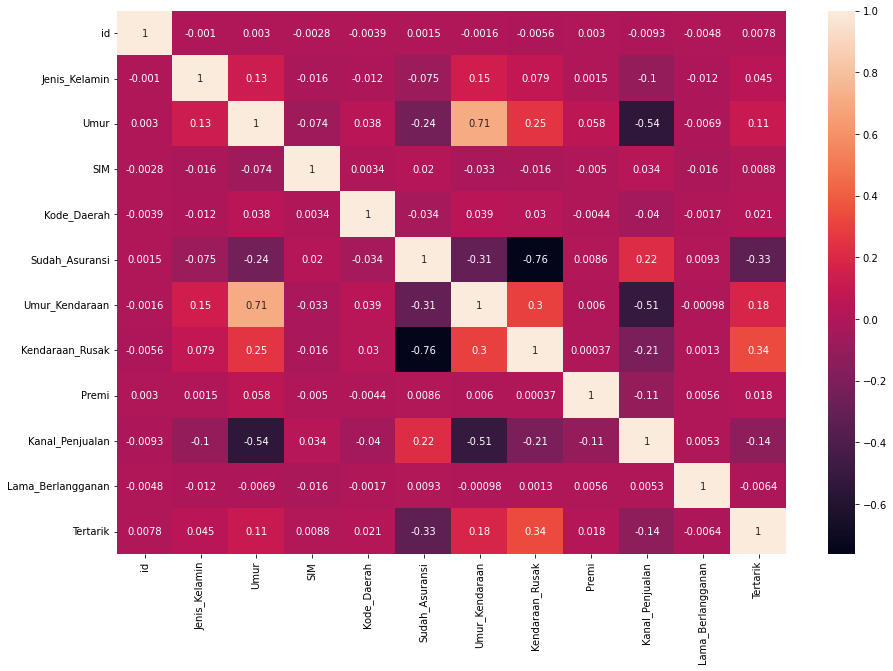

In [22]:
# Menampilkan korelasi
plt.figure(figsize=(15,10))
cor = kendaraan.corr()

seaborn.heatmap(cor, annot=True)
plt.show()

# Pemodelan

In [23]:
# Membuat Centroid
def centroid (kendaraan):
    k = 3
    i = 0
    centroids = {
        i + 1 : [random.choices(kendaraan['Kode_Daerah']),random.choices(kendaraan['Umur'])]
        for i in range(k)
    }
    return centroids

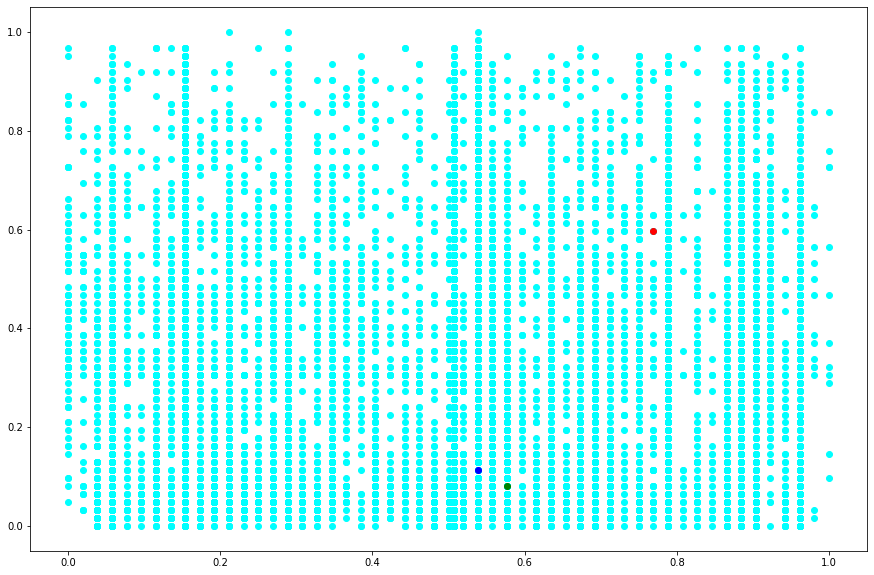

In [24]:
# Melihat persebaran centroid
c = centroid(kendaraan)

fig = plt.figure(figsize=(15,10))
plt.scatter(kendaraan['Kode_Daerah'], kendaraan['Umur'], color='cyan')
colmap = {1: 'red', 2: 'green', 3: 'blue'}
for i in c.keys():
    plt.scatter(*c[i], color = colmap[i])
  

plt.show()

In [25]:
# Menghitung jarak terdekat ke Centroid
def Jarak(kendaraan, centroids):
    for i in centroids.keys():
        kendaraan['dist{}'.format(i)] = (
            np.sqrt(
                (kendaraan['Kode_Daerah'] - centroids[i][0])**2 + (kendaraan['Umur'] - centroids[i][1])**2
            )
        )
    centroid_distance = ['dist{}'.format(i) for i in centroids.keys()]
    kendaraan['nearest'] = kendaraan.loc[:, centroid_distance].idxmin(axis=1)
    kendaraan['nearest'] = kendaraan['nearest'].map(lambda x: int(x.lstrip('dist')))
    kendaraan['color'] = kendaraan['nearest'].map(lambda x: colmap[x])
    return kendaraan

kendaraan = Jarak(kendaraan, c)
kendaraan

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,dist1,dist2,dist3,nearest,color
0,0.000000,0.0,0.161290,1.000000,0.634615,1.000000,0.0,0.0,0.054108,0.932099,0.301038,0.0,0.455815,0.099157,0.107642,2,green
1,0.000050,1.0,0.451613,1.000000,0.750000,0.000000,0.5,1.0,0.049360,0.172840,0.512111,0.0,0.146430,0.409356,0.399340,1,red
2,0.000100,1.0,0.016129,1.000000,0.884615,1.000000,0.0,0.0,0.064129,0.981481,0.377163,0.0,0.591999,0.314383,0.359427,2,green
3,0.000149,0.0,0.612903,1.000000,0.923077,0.000000,1.0,0.0,0.000000,0.759259,0.183391,0.0,0.154689,0.634918,0.630816,1,red
4,0.000199,1.0,0.483871,1.000000,0.673077,0.000000,0.5,1.0,0.068654,0.537037,0.636678,0.0,0.148299,0.414532,0.394637,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20092,0.999801,0.0,0.354839,1.000000,0.538462,1.000000,1.0,0.0,0.092132,0.154321,0.695502,0.0,0.334346,0.276878,0.241935,3,blue
20093,0.999851,0.0,0.500000,1.000000,0.961538,0.000000,0.5,1.0,0.047038,0.043210,0.176471,0.0,0.215285,0.569023,0.573444,1,red
20094,0.999900,1.0,0.064516,1.000000,0.288462,1.000000,0.0,0.0,0.110879,0.932099,0.103806,0.0,0.717243,0.288912,0.254640,3,blue
20095,0.999950,0.0,0.370968,1.000000,0.346154,1.000000,1.0,0.0,0.059176,0.688535,0.619377,0.0,0.479565,0.370866,0.321838,3,blue


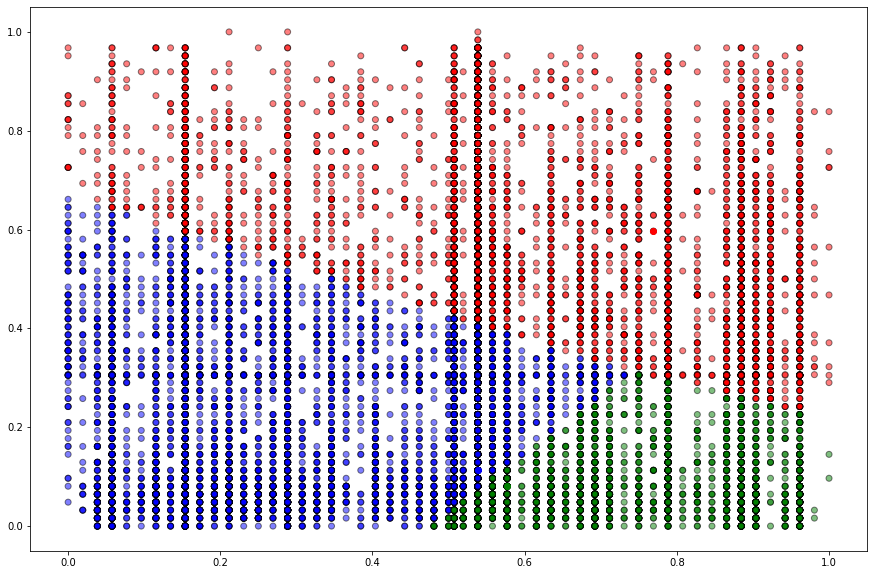

In [26]:
# Menampilkan hasil dengan menggunakan scatterplot
fig = plt.figure(figsize=(15, 10))
plt.scatter(kendaraan['Kode_Daerah'], kendaraan['Umur'], color=kendaraan['color'], alpha=0.5, edgecolor='k')
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i])

# Evaluasi

Text(0, 0.5, 'Within-cluster Sum of Squares')

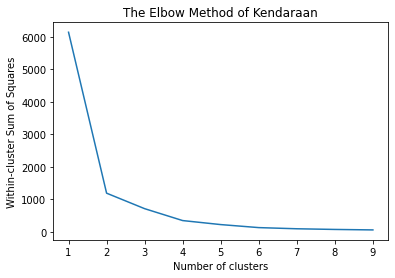

In [27]:
# Elbow Method
from sklearn.cluster import KMeans

WCSS=[]
x = kendaraan.iloc[:, 1:3] 
for i in range(1,10):
    #Solusi cluster dengan cluster i
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(x)
    # Temukan WCSS untuk iterasi saat ini
    iter = kmeans.inertia_
    # Tambahkan nilai ke daftar WCSS
    WCSS.append(iter)
number_clusters = range(1,10)
plt.plot(number_clusters,WCSS)
plt.title('The Elbow Method of Kendaraan')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Data set yang diolah

In [28]:
# membuat file baru
kendaraan.to_csv('NewKendaraan.csv')